# Preparing dataset, loading models 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

uploads_folder = 'data'
img_height = 128  # adjust based on your model
img_width = 128

batch_size = 32
upload_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    uploads_folder,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False  # Keep this False to preserve the order
)

class_names = upload_dataset.class_names
print("Class Names: ", class_names)

2024-10-17 22:28:13.501608: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-17 22:28:13.501846: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-17 22:28:13.505299: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-17 22:28:13.537652: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-17 22:28:14.094634: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

Found 243 files belonging to 4 classes.
Class Names:  ['glioma', 'meningioma', 'notumor', 'pituitary']


2024-10-17 22:28:15.987113: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


# Making confusion matrices for models

In [10]:
def confusion_matrix_maker(model, model_name):
    # Step 3: Make predictions
    predictions = []
    true_labels = []  # Store the true labels from the dataset

    for images, labels in upload_dataset:
        preds = model.predict(images)
        predicted_classes = np.argmax(preds, axis=-1)
        predictions.extend(predicted_classes)
        true_labels.extend(labels.numpy())  # Extract the true labels

    # Step 4: Generate the confusion matrix
    predictions = np.array(predictions)
    true_labels = np.array(true_labels)

    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, predictions)

    # Step 5: Visualize the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(model_name)
    plt.show()
    return predictions 

In [6]:
from tensorflow import keras
scratch = keras.models.load_model("models/scratch.keras")
resnet = keras.models.load_model("models/resnet-basic.keras")
resnet_tuned = keras.models.load_model("models/resnet-tuned.keras")
vgg = keras.models.load_model("models/vgg16_final.keras")
effnet = keras.models.load_model("models/effnet-basic.keras")
effnet_tuned = keras.models.load_model("models/effnet-tuned.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


2024-10-17 22:45:45.434132: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


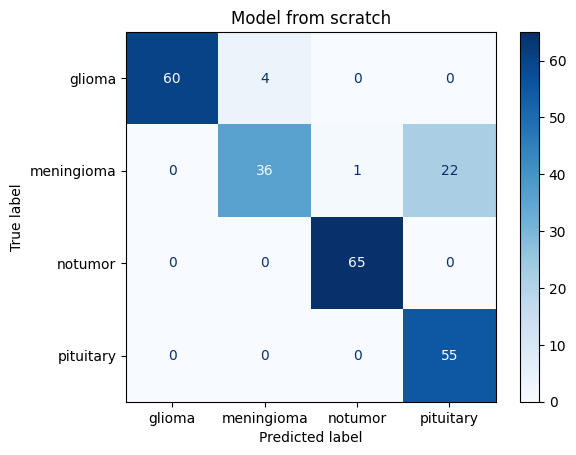

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


2024-10-17 22:45:49.731449: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


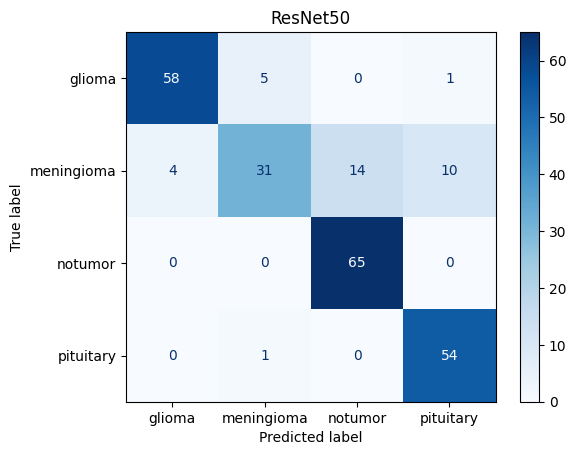

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


2024-10-17 22:45:54.040460: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


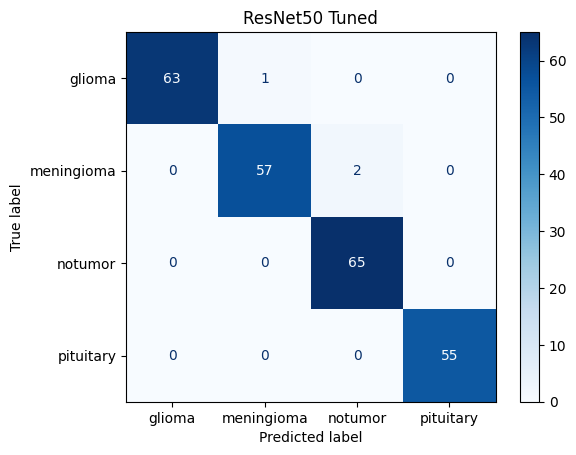

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


2024-10-17 22:45:54.617379: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


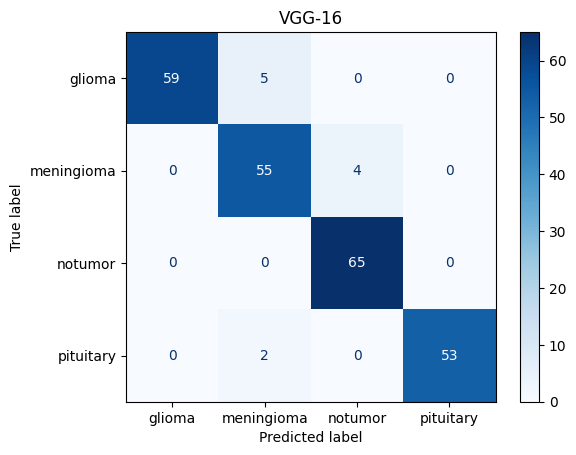

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


2024-10-17 22:45:55.745257: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


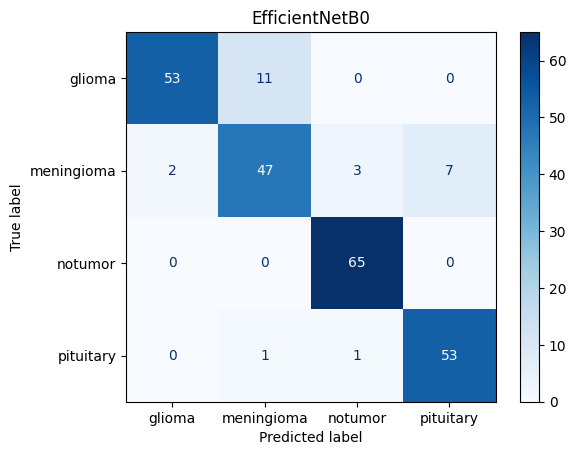

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


2024-10-17 22:45:56.872086: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


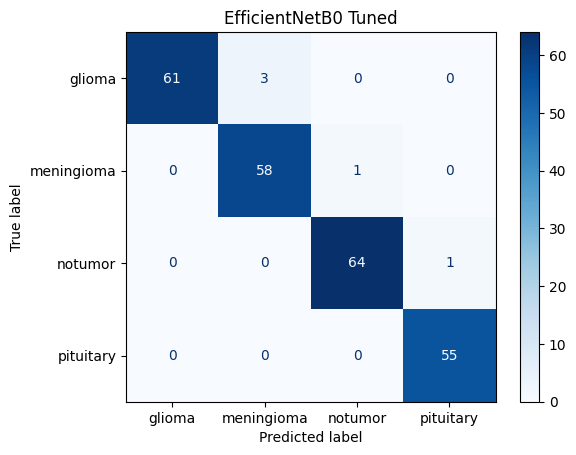

In [21]:
scratch_preds = confusion_matrix_maker(scratch, "Model from scratch")
resnet_preds = confusion_matrix_maker(resnet, "ResNet50")
resnet_tuned_preds = confusion_matrix_maker(resnet_tuned, "ResNet50 Tuned")
vgg_preds = confusion_matrix_maker(vgg, "VGG-16")
effnet_preds = confusion_matrix_maker(effnet, "EfficientNetB0")
effnet_tuned_preds = confusion_matrix_maker(effnet_tuned, "EfficientNetB0 Tuned")

# Compile important metrics

In [ ]:
true_labels = []
for _, labels in upload_dataset:
    true_labels.extend(labels.numpy())
true_labels = np.array(true_labels)

In [28]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Simulated predictions and true labels for 6 models
predictions = {
    'Model from scratch': scratch_preds,
    'ResNet50': resnet_preds,
    'ResNet50 Tuned': resnet_tuned_preds,
    'VGG-16': vgg_preds, 
    'EfficientNetB0': effnet_preds,
    'EfficientNetB0 Tuned': effnet_tuned_preds 
}

# Initialize a list to store the metrics
metrics = []

# Calculate metrics for each model
for model_name, preds in predictions.items():
    accuracy = accuracy_score(true_labels, preds)
    precision = precision_score(true_labels, preds, average="weighted")
    recall = recall_score(true_labels, preds, average="weighted")
    f1 = f1_score(true_labels, preds, average="weighted")
    
    metrics.append({
        'Model': model_name,
        'Accuracy': f"{round(accuracy * 100, 2)}%",
        'Precision': f"{round(precision * 100, 2)}%",
        'Recall': f"{round(recall * 100, 2)}%",
        'F1 Score': f"{round(f1 * 100, 2)}%",
    })

# Create a DataFrame from the metrics
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
print(metrics_df)


                  Model Accuracy Precision  Recall F1 Score
0    Model from scratch   88.89%     90.7%  88.89%   88.55%
1              ResNet50    85.6%    85.79%   85.6%   84.45%
2        ResNet50 Tuned   98.77%    98.78%  98.77%   98.76%
3                VGG-16   95.47%    95.71%  95.47%    95.5%
4        EfficientNetB0   89.71%    89.91%  89.71%   89.61%
5  EfficientNetB0 Tuned   97.94%    97.99%  97.94%   97.94%


# Markdown code for metric table

| Model                     | Accuracy | Precision | Recall | F1 Score |
|---------------------------|----------|-----------|--------|----------|
| Model from scratch        | 88.89%   | 90.70%    | 88.89% | 88.55%   |
| ResNet50                  | 85.60%   | 85.79%    | 85.60% | 84.45%   |
| EfficientNetB0           | 89.71%   | 89.91%    | 89.71% | 89.61%   |
| VGG-16                    | 95.47%   | 95.71%    | 95.47% | 95.50%   |
| ResNet50 Tuned            | 98.77%   | 98.78%    | 98.77% | 98.76%   |
| EfficientNetB0 Tuned      | 97.94%   | 97.99%    | 97.94% | 97.94%   |
